In [92]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [93]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [94]:
NUM_CLASSES = 6

# Dataset reading

In [95]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [96]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [98]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [99]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_10 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 20)                860       
_________________________________________________________________
dropout_11 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 66        
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [100]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [101]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [102]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
51/51 [==============================] - 1s 11ms/step - loss: 1.8534 - accuracy: 0.1683 - val_loss: 1.6727 - val_accuracy: 0.3894

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
51/51 [==============================] - 0s 8ms/step - loss: 1.6677 - accuracy: 0.2880 - val_loss: 1.5421 - val_accuracy: 0.4136

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
51/51 [==============================] - 0s 6ms/step - loss: 1.5586 - accuracy: 0.3332 - val_loss: 1.4173 - val_accuracy: 0.4918

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
51/51 [==============================] - 0s 10ms/step - loss: 1.4722 - accuracy: 0.3529 - val_loss: 1.2966 - val_accuracy: 0.5231

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
51/51 [==============================] - 0s 8ms/step - loss: 1.3909 - accuracy: 0.3926 - val_


Epoch 00037: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 38/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.8631 - accuracy: 0.6664 - val_loss: 0.5243 - val_accuracy: 0.9143

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.8438 - accuracy: 0.6709 - val_loss: 0.5152 - val_accuracy: 0.9264

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.8489 - accuracy: 0.6755 - val_loss: 0.5088 - val_accuracy: 0.9148

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.8321 - accuracy: 0.6772 - val_loss: 0.4985 - val_accuracy: 0.9185

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
51/51 [==

51/51 [==============================] - 0s 4ms/step - loss: 0.7703 - accuracy: 0.7073 - val_loss: 0.4185 - val_accuracy: 0.9339

Epoch 00074: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 75/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.7509 - accuracy: 0.7159 - val_loss: 0.4323 - val_accuracy: 0.9297

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
51/51 [==============================] - 0s 8ms/step - loss: 0.7408 - accuracy: 0.7291 - val_loss: 0.4147 - val_accuracy: 0.9353

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
51/51 [==============================] - 0s 8ms/step - loss: 0.7521 - accuracy: 0.7249 - val_loss: 0.4273 - val_accuracy: 0.9320

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
51/51 [==============================] - 0s 6ms/step - loss: 0.7547 - accuracy: 0.7229 - val_loss: 0.441


Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 111/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.7351 - val_loss: 0.4149 - val_accuracy: 0.9329

Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 112/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.7085 - accuracy: 0.7401 - val_loss: 0.4168 - val_accuracy: 0.9311

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.7164 - accuracy: 0.7403 - val_loss: 0.4308 - val_accuracy: 0.9166

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.7463 - val_loss: 0.4172 - val_accuracy: 0.9264

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
51/5

51/51 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.7539 - val_loss: 0.4330 - val_accuracy: 0.9166

Epoch 00147: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 148/1000
51/51 [==============================] - 0s 6ms/step - loss: 0.6790 - accuracy: 0.7614 - val_loss: 0.4305 - val_accuracy: 0.9041

Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
51/51 [==============================] - 0s 5ms/step - loss: 0.6786 - accuracy: 0.7510 - val_loss: 0.4130 - val_accuracy: 0.9208

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
51/51 [==============================] - 0s 7ms/step - loss: 0.6698 - accuracy: 0.7547 - val_loss: 0.4280 - val_accuracy: 0.9162

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
51/51 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.7479 - val_loss: 0

In [103]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

17/17 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.8957


In [104]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [105]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.0875245e-01 1.6788046e-01 9.0403284e-04 6.2005913e-01 2.4040169e-03
 2.4314806e-13]
3


# Confusion matrix

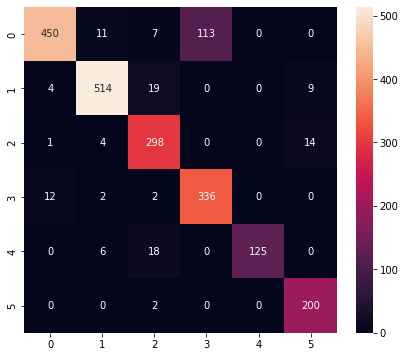

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.77      0.86       581
           1       0.96      0.94      0.95       546
           2       0.86      0.94      0.90       317
           3       0.75      0.95      0.84       352
           4       1.00      0.84      0.91       149
           5       0.90      0.99      0.94       202

    accuracy                           0.90      2147
   macro avg       0.90      0.91      0.90      2147
weighted avg       0.91      0.90      0.90      2147



In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [107]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [108]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Jeremy\AppData\Local\Temp\tmp_gb5zosh\assets


INFO:tensorflow:Assets written to: C:\Users\Jeremy\AppData\Local\Temp\tmp_gb5zosh\assets


6416

# Inference test

In [109]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [110]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [111]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [112]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 1.02 ms


In [113]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.0875247e-01 1.6788048e-01 9.0403308e-04 6.2005901e-01 2.4040188e-03
 2.4314849e-13]
3
